In [1]:
# Adapted from Udemy course

In [62]:
import pickle
import numpy as np

In [63]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [64]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [65]:
train_data[0:2]

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no')]

In [66]:
test_data[0:2]

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no')]

In [67]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [68]:
' '.join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [69]:
all_data = test_data + train_data

In [70]:
len(all_data)

11000

In [71]:
all_data[10]

(['John',
  'moved',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'hallway', '?'],
 'yes')

In [72]:
vocab = set() # initializing

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [76]:
vocab.add('no')
vocab.add('yes')

In [77]:
vocab_len = len(vocab) + 1 # placeholder to add for padding the sequence

In [78]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [79]:
vocab_len

38

In [80]:
# Longest story
all_story_lens = [len(data[0]) for data in all_data]

In [81]:
all_story_lens[0:10]

[12, 23, 35, 47, 59, 13, 26, 37, 50, 62]

In [82]:
max_story_len = max(all_story_lens)
print(max_story_len)

156


In [83]:
max_question_len = max([len(data[1]) for data in all_data])

In [84]:
max_question_len

6

In [85]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [86]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [87]:
tokenizer.word_index

{'?': 1,
 'grabbed': 2,
 'in': 3,
 'down': 4,
 'the': 5,
 'daniel': 6,
 'bathroom': 7,
 'office': 8,
 'up': 9,
 'back': 10,
 'got': 11,
 'travelled': 12,
 'journeyed': 13,
 'took': 14,
 'there': 15,
 'mary': 16,
 'moved': 17,
 'put': 18,
 'football': 19,
 'milk': 20,
 'garden': 21,
 'bedroom': 22,
 'left': 23,
 'no': 24,
 'yes': 25,
 'to': 26,
 'hallway': 27,
 'discarded': 28,
 'picked': 29,
 'is': 30,
 '.': 31,
 'dropped': 32,
 'kitchen': 33,
 'john': 34,
 'went': 35,
 'apple': 36,
 'sandra': 37}

In [88]:
train_story_text = []
train_question_text = []
train_answers = []

In [89]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [90]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [91]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [92]:
# See how it's changed
# first word Mary/mary is 16 above
train_story_seq[0]

[16, 17, 26, 5, 7, 31, 37, 13, 26, 5, 22, 31]

In [93]:
len(train_story_text)

10000

In [94]:
len(train_story_seq)

10000

In [97]:
def vectorize_stories(data, word_index=tokenizer.word_index, \
                      max_story_len=max_story_len,\
                      max_question_len=max_question_len):
    # Stories = X
    X = []
    # Questions = Xq
    # Target = y
    Xq = []
    Y = []
    
    for story,query,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    
    return (pad_sequences(X,maxlen=max_story_len),\
            pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [98]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [99]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [100]:
inputs_train

array([[ 0,  0,  0, ...,  5, 22, 31],
       [ 0,  0,  0, ...,  5, 27, 31],
       [ 0,  0,  0, ...,  5,  7, 31],
       ...,
       [ 0,  0,  0, ...,  5, 22, 31],
       [ 0,  0,  0, ..., 20, 15, 31],
       [ 0,  0,  0, ..., 36, 15, 31]], dtype=int32)

In [101]:
queries_train

array([[30, 37,  3,  5, 27,  1],
       [30,  6,  3,  5,  7,  1],
       [30,  6,  3,  5,  8,  1],
       ...,
       [30, 37,  3,  5, 27,  1],
       [30, 16,  3,  5, 33,  1],
       [30, 16,  3,  5, 22,  1]], dtype=int32)

In [102]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 503., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [143]:
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate, Embedding
from keras.layers import LSTM

In [144]:
# PLACEHOLDER shape=(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [145]:
vocab_size = len(vocab) + 1

In [146]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64)) # from the lecture
input_encoder_m.add(Dropout(0.3))


In [147]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# (samples,story_maxlen, max_question_len)

In [148]:
# QUESTION ENCODER
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# (samples,query_maxlen, embedding_dim)

In [149]:
# ENCODED --> ENCODER(INPUT) [note the spelling changes]
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [150]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [151]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [152]:
answer = concatenate([response, question_encoded])

In [153]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_3')>

In [154]:
answer = LSTM(32)(answer)

In [155]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (samples,vocab_size) # YES/NO

In [156]:
answer = Activation('softmax')(answer)

In [157]:
model = Model([input_sequence,question],answer)

In [158]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [159]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_10 (Sequential)     (None, None, 64)     2432        ['input_5[0][0]']                
                                                                                                  
 sequential_12 (Sequential)     (None, 6, 64)        2432        ['input_6[0][0]']                
                                                                                            

In [162]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,
                   epochs=10,
                    validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/10
313/313 [==============================] - 12s 12ms/step - loss: 0.9299 - accuracy: 0.4987 - val_loss: 0.6960 - val_accuracy: 0.5030
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 0.7084 - accuracy: 0.4992 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6968 - accuracy: 0.5030 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6952 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6950 - accuracy: 0.4985 - val_loss: 0.6954 - val_accuracy: 0.4970
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6953 - accuracy: 0.4964 - val_loss: 0.6941 - val_accuracy: 0.4970
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6941 - accuracy: 0.5053 - val_loss: 0.6970 - val_accuracy: 0.5030
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


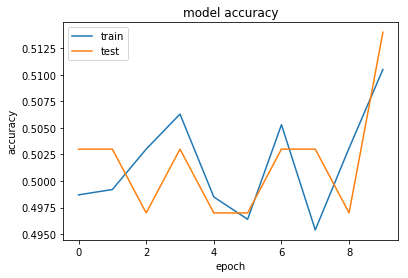

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [231]:
# Using another model weights
model.load_weights('chatbot_120_epochs.h5')

pred_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 0s 3ms/step


In [232]:
pred_results.shape

(1000, 38)

In [233]:
# Probability for every word
pred_results[0]

array([8.3846662e-12, 9.4030348e-12, 8.8190913e-12, 8.3497636e-12,
       9.2504771e-12, 7.6175255e-12, 9.4455093e-01, 8.7983249e-12,
       8.3426798e-12, 7.9485940e-12, 8.5653828e-12, 9.2438097e-12,
       8.4587814e-12, 1.0007302e-11, 8.1437348e-12, 9.9697516e-12,
       7.9999115e-12, 8.9048569e-12, 7.8706885e-12, 5.5449057e-02,
       8.1443715e-12, 7.3323708e-12, 1.0344996e-11, 8.3277508e-12,
       7.6033728e-12, 8.2136667e-12, 1.0469016e-11, 7.1173037e-12,
       7.4610483e-12, 7.3575321e-12, 7.8982688e-12, 8.1928422e-12,
       8.6456771e-12, 9.2177880e-12, 7.8621953e-12, 9.1252145e-12,
       1.0296570e-11, 6.9484284e-12], dtype=float32)

In [234]:
val_max = np.argmax(pred_results[0])

In [235]:
val_max

6

In [236]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        print(key)
        k = key

daniel


In [237]:
k

'daniel'

In [202]:
pred_results[0][val_max]

0.94455093

In [ ]:
# For some reason, this code is giving the output as either football or daniel

In [238]:
# custom example
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_question = "Is the football in the garden ?"
mydata = [(my_story.split(),my_question.split(),'yes')]

In [242]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [243]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 34,
        23,  5, 33, 31, 37, 32,  5, 19,  3,  5, 21, 31]], dtype=int32)

In [246]:
pred_results = model.predict(([ my_story, my_ques]))

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        print(key)
        k = key

1/1 [==============================] - 0s 102ms/step
football
